In [1]:
%pip install nbdt

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 440kB 8.8MB/s 
  Created wheel for nbdt: filename=nbdt-0.0.4-cp36-none-any.whl size=132325 sha256=46be8530a8bdcd23aba712bdcbf7a8e070e4a12ce55781a6a2634737638de0fb
  Stored in directory: /root/.cache/pip/wheels/24/42/99/f41adfed4f1250366d8add49449d06ca7583043684e3a3f4bd
Successfully built nbdt


In [0]:
from nbdt.model import SoftNBDT
from nbdt.model import HardNBDT
from nbdt.models import ResNet18, wrn28_10_cifar10, wrn28_10_cifar100, wrn28_10  # use wrn28_10 for TinyImagenet200
from torchvision import transforms
from nbdt.utils import DATASET_TO_CLASSES, load_image_from_path, maybe_install_wordnet
from IPython.display import display
#import advertorch as at

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


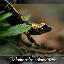

In [9]:
im = load_image_from_path('/content/gdrive/My Drive/CS182-Final-Project-Computer-Vision/test_0.jpeg')
display(im)

In [0]:
import torch
model = ResNet18()
model.linear = torch.nn.Linear(in_features=512, out_features=200, bias=True)
model = HardNBDT(
  pretrained=True,
  dataset='TinyImagenet200',
  arch='ResNet18',
  hierarchy='wordnet',
  model=model)

In [0]:
transforms = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
x = transforms(im)[None]

In [0]:
outputs = model.forward_with_decisions(x)

In [16]:
outputs

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]]),
 [[{'name': 'root',
    'node': <nbdt.data.custom.Node at 0x7f193e7b2278>,
  